In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [3]:
# 데이터 불러오기
dirpath = "./dataset/"
datasets = os.listdir(dirpath)
aisles = pd.read_csv(dirpath+datasets[0])
depts = pd.read_csv(dirpath+datasets[1])
orders = pd.read_csv(dirpath+datasets[2])
opp = pd.read_csv(dirpath+datasets[3])
# opt = pd.read_csv(dirpath+datasets[4]) # 일단 prior만 사용
products = pd.read_csv(dirpath+datasets[5])

In [4]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
depts.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
opp.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
orders = orders.loc[orders.eval_set=="prior"] # 테스트 데이터셋은 제외

In [11]:
tmp_df = pd.merge(opp, products, on="product_id", how="left")
tmp_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [12]:
tmp_df = pd.merge(tmp_df, aisles, on="aisle_id", how="left")
tmp_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients


In [13]:
tmp_df = pd.merge(tmp_df, depts, on="department_id", how="left")
tmp_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [38]:
tmp = orders.groupby("user_id").count()

<Axes: xlabel='count', ylabel='aisle'>

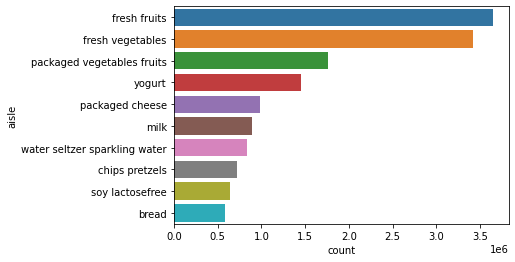

In [14]:
# 많이 팔린 aisle
sns.countplot(y="aisle", data=tmp_df, order = tmp_df.aisle.value_counts().iloc[:10].index) # 상위 10개

<Axes: xlabel='count', ylabel='product_name'>

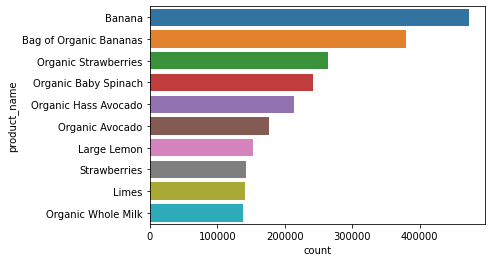

In [15]:
# 주문 품목 순위
sns.countplot(y="product_name", data=tmp_df, order = tmp_df.product_name.value_counts().iloc[:10].index) # 상위 10개

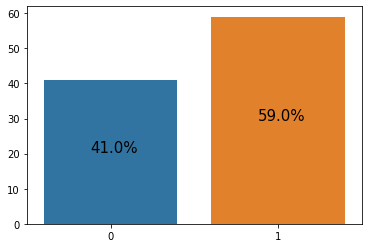

In [16]:
# 재주문율
tmp = tmp_df.reordered.value_counts(normalize=True)
tmp = tmp.mul(100).round(decimals=1)

ax = sns.barplot(x=tmp.index, y=tmp.values)
for p in ax.patches:
    percentage = f'{p.get_height()}%'
    x = p.get_x() + p.get_width() / 2 - 0.12
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), size = 15)

plt.show()

<Axes: xlabel='count', ylabel='department'>

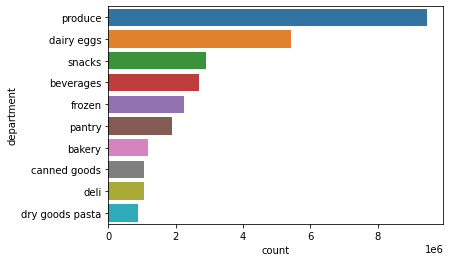

In [17]:
# 많이 팔린 department
sns.countplot(y="department", data=tmp_df, order = tmp_df.department.value_counts().iloc[:10].index) # 상위 10개

<Axes: xlabel='days_since_prior_order', ylabel='count'>

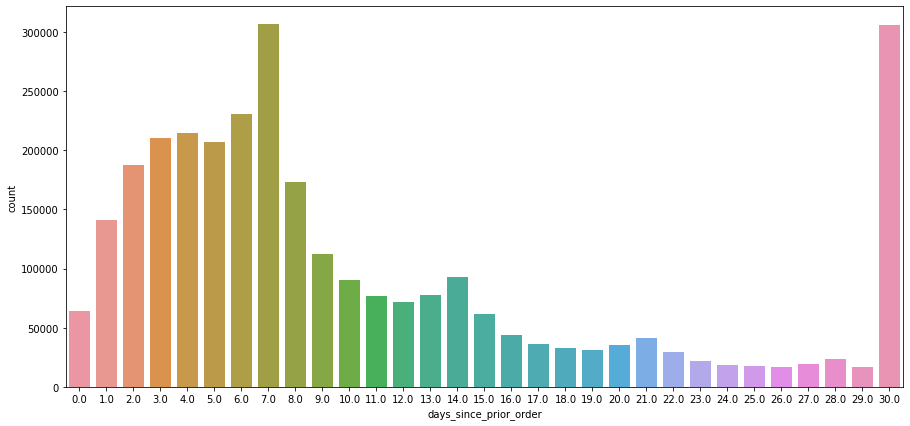

In [20]:
# 재구매 빈도
plt.figure(figsize=(15, 7))
sns.countplot(x="days_since_prior_order", data=orders)

<Axes: xlabel='order_hour_of_day', ylabel='count'>

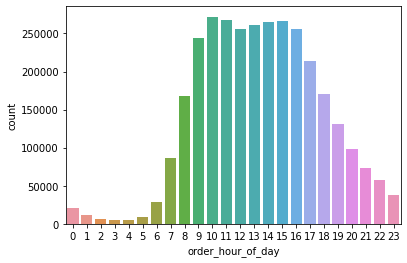

In [21]:
# 주문 시간
sns.countplot(x="order_hour_of_day", data=orders)

<Axes: xlabel='order_dow', ylabel='count'>

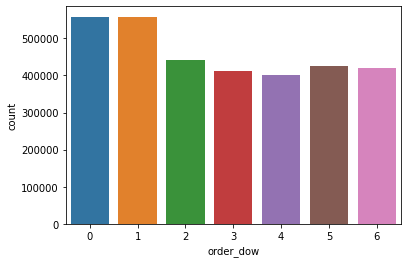

In [22]:
# 주문 요일
sns.countplot(x="order_dow", data=orders)

In [ ]:
# 시간대 별 인기 품목


In [ ]:
# 재구매율이 높은 상품
